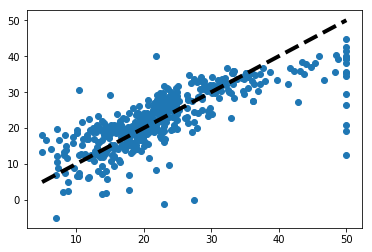

In [10]:
from sklearn import datasets
from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
boston=datasets.load_boston()
#print(boston.DESCR)
#print(boston.data)
#print(boston.target)
#CRIM(犯罪率) ZN(房屋大於25000ft比率) INDUS(住宅比率)
#CHAS(有無臨河) NOX(空汙比率) RM(房間數) AGE(自有住宅比例)
#DIS(離市中心距離) RAD(離高速公路距離) TAX(房屋稅率)
#PTRATID(小學老師比例) B(黑人比率) LSTAT(低收入比率) MEDV(受雇者收入)
lr=linear_model.LinearRegression()
predicted = cross_val_predict(lr, boston.data, boston.target, cv=10)
#分成十份來評練，其中一份為測試集
import matplotlib.pyplot as plt
y = boston.target
fig, ax = plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

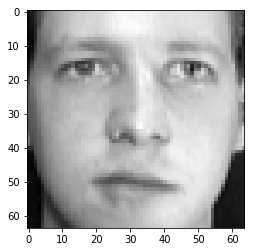

In [7]:
from sklearn import datasets
import matplotlib.pyplot as plt
data=datasets.fetch_olivetti_faces()
#print(data.DESCR)
#print(data.target)
#print(data.data)
plt.imshow(data.images[7],cmap='gray',interpolation='nearest')
plt.show()
targets=data.target
data=data.images.reshape(len(data.images),-1)
train=data[targets<30]
test=data[targets>=30]

n_faces = 5
from sklearn.utils import check_random_state
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces,))
test = test[face_ids, :]

n_pixels = data.shape[1]
X_train = train[:, :(n_pixels + 1) // 2]
y_train = train[:, :n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, :n_pixels // 2:]

from sklearn.linear_model import LinearRegression
ESTIMATORS = {
    "Linear regression": LinearRegression(),
}
y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train) #模型訓練
    y_test_predict[name] = estimator.predict(X_test)
    #模型預測
    